## Predicting Developer Salaries

### Project Background


### Stakeholders: 
- Jobseekers
- Employers
- Recruitment agencies

### Business Understanding
Salary negotiation can be a critical stage in the job search process, and job seekers often encounter various challenges during this phase like lack of information on salary trends. This means that a jobseeker might spend valuable time researching industry salary trends. Some might not be so lucky as the information might be non existent.

As the labour market becomes more competitive, offering the right salary for new and current employees is crucial for employers as it means keeping or losing a valued resource. Thus it is imperative for them to offer fair and competitive compensation that is benchmarked to their industry

Our project looks at coming up with salary prediction model to help both jobseekers and employers with the above challenges. We will focus on the tech industry (developers) and use data from stackoverflow's annual developer survey.

### Problem statement
Our solution to the problem of inadequate salary data for both employees and employers is to develop a salary prediction model, to estimate salaries based on relevant job specifications. The model will assist in making informed decisions related to compensation and provide valuable insights for both job seekers and employers.

The salary prediction model will enable job seekers to have a better understanding of the salary expectations associated with their qualifications and experience. 

Employers can use the model to make informed decisions regarding fair compensation packages for new hires or salary adjustments for existing employees.

Job sites like linkedin, glassdoor, brigther monday can use this model for jobs displayed on the sites by quoting the estimated salaries 


### Objectives
The main objective is to come up with with a salary prediction model that will:
- help jobseekers to ask for competitive salaries during contract negotiations
- help employers to give fair compensation to new hires and existing staff who have been promoted
- help job sites like brighter monday, fuzu, linkedin etc to give salary information for job postings based on job skills/specifications

The specific objectives - WIP
- Identify the most important features to salary prediction
- Model Metrics (R2 at %, RMSE at )
- 

### Data Understanding
The data comes from [stakoverflow annual developer survey](https://insights.stackoverflow.com/survey/) for 2022. Each row shows the responses given by a developer. It has 73268 rows and  79 columns. The data has missing values, but no duplicate rows.

The target variable ConvertedCompYearly shows the annual salary for each developer.
The data contains responses from 180 countries.
Opportunities to clean the data and use PCA to reduce the number of columns



In [40]:
# import all required modules
import pandas as pd
import numpy as np

In [41]:

df = pd.read_csv(r'C:\Users\ADMIN\OneDrive - Kantar\XXXXXXXX\POV1\Data Science\Moringa\data\survey_results_public.csv')
df.head(2) 

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN


#### Class for Understanding Dataset
Below we create a class to:
- give data dimensions
- display column info
- give descriptive stats on numerical columns
- check data types, duplicates & missing values

From the below outputs of the class:
- The Dataset has no duplicates
- Data has 6 numeric columns and 73 categorical columns
- 77 columns have missing values, ranging from 2% (`country` column) to 100% (`VCHostingProfessional use` & `VCHostingPersonal use` columns). We will deal with missing values in the data cleaning section

In [42]:
# class to describe dataset

class Describer:
    
    # initialize object
    def __init__(self, df):
        self.df = df
        
    # method to check shape of data
    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return out
    
    # method to check info on dataset
    def data_info(self):
        out = print(self.df.info(), '\n')
        return out
    
    # method to describe numerical columns
    def data_describe(self):
        out = self.df.describe()
        return out
    
    # method to check data types
    def data_type(self):
        """A simple function to check the data types on th datasets """

        print("Data has",len( df.select_dtypes(include='number').columns),
                "Numeric columns")
    
        print("and", len(df.select_dtypes(include='object').columns),
          "Categorical columns")

        print('*******************')
        print('*******************')

        print('Numerical Columns:', df.select_dtypes(include='number').columns)
        print('Categorical Coulumns:', df.select_dtypes(include='object').columns)

        return None
    
    # check duplicates 

    def check_duplicates(self):
        duplicates = []

        """Function that iterates through the rows of our dataset to check whether they are duplicated or not"""
        
        for i in df.duplicated():
            duplicates.append(i)
        duplicates_set = set(duplicates)
        if(len(duplicates_set) == 1):
            print('The Dataset has No Duplicates')

        else:
            duplicates_percentage = np.round(((sum(duplicates)/len(df)) * 100 ), 2)
            print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')
        
        return None
    
    # method to check missing values
    def missing_values(self):

        """ Function for checking null values in percentage in relation to length of the dataset """

        if df.isnull().any().any() == False :

            print("There Are No Missing Values")

        else:

            missing_values = df.isnull().sum().sort_values(ascending=False)

            missing_val_percent = ((df.isnull().sum()/len(df)).sort_values(ascending=False))

            missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_val_percent})

            return missing_df[missing_df['Percentage %'] > 0]
        
# creating an instance of the class describer
describe_df = Describer(df)

# lets view the shape of the data
describe_df.shape()

# lets check for duplicates
describe_df.check_duplicates()

# lets describe data types
describe_df.data_type()

# lets view the info of the data
describe_df.data_info()

# lets describe numerical cols
describe_df.data_describe()

# lets get missing values
describe_df.missing_values()




The DataFrame has:
	* 73268 rows
	* 79 columns 

The Dataset has No Duplicates
Data has 6 Numeric columns
and 73 Categorical columns
*******************
*******************
Numerical Columns: Index(['ResponseId', 'CompTotal', 'VCHostingPersonal use',
       'VCHostingProfessional use', 'WorkExp', 'ConvertedCompYearly'],
      dtype='object')
Categorical Coulumns: Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 

,Missing Values,Percentage %
VCHostingProfessional use,73268,1.000000
VCHostingPersonal use,73268,1.000000
LearnCodeCoursesCert,43879,0.598884
OfficeStackAsyncWantToWorkWith,41196,0.562265
Frequency_3,38753,0.528921
...,...,...
EdLevel,1697,0.023162
SOAccount,1696,0.023148
LearnCode,1688,0.023039
Employment,1559,0.021278


### Data Cleaning
The data cleaning process will entail the following:
- Renaming clumsily worded columns for easier understanding
- Dealing with missing data from the 77 columns
    - Drop columns with 100% missing data

#### Renaming Columns
When going through the data, we noticed some clumsily worded columns. To make the data easier to understand, we came up with new names. Below we code a function that will take in the new and old names as key-value pairs, then use these to rename the columns in the dataframe.

We have run the function below and confirmed renaming of a few columns e.g. columns 3 to 5

In [43]:

def rename(data):

    # import text doc with old and new col names
    cols = pd.read_csv(r'cols.txt', sep='\t')

    # create a dictionary with the cols df
    cols_dict = dict(zip(cols['Old'], cols['New']))

    # rename cols in the dataframe
    df = data.rename(columns = cols_dict)

    return df

df = rename(df)
df.head()

,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeSearching_Answers,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


### Cleaning Missing Data
`VCHostingProfessional use` and `VCHostingPersonal use` columns have no data, hence have 100% missing values. We drop these 2 columns for this reason

In [44]:
describe_df.missing_values()

,Missing Values,Percentage %
VCHostingProfessional use,73268,1.000000
VCHostingPersonal use,73268,1.000000
Code_Certifications,43879,0.598884
Proj_Mgmt_WantToWorkWith,41196,0.562265
Knowledge_Silos,38753,0.528921
...,...,...
Education_Level,1697,0.023162
SOAccount_Ownership,1696,0.023148
Learn_Code_Method,1688,0.023039
Employment_Status,1559,0.021278


In [46]:
# function to drop 'VCHostingProfessional use' &  'VCHostingPersonal use' cols
def dropping_columns(data, columns):

    """A simple function to drop columns with missing values"""

    drop_column = data.drop(columns=columns, axis=1)
    
    return drop_column

columns_to_drop = ['VCHostingProfessional use', 'VCHostingPersonal use']

df = dropping_columns(df, columns_to_drop)

describe_df.missing_values()


,Missing Values,Percentage %
Code_Certifications,43879,0.598884
Proj_Mgmt_WantToWorkWith,41196,0.562265
Knowledge_Silos,38753,0.528921
ProfessionalTech,38362,0.523585
Siloed_Teams,38295,0.522670
...,...,...
Education_Level,1697,0.023162
SOAccount_Ownership,1696,0.023148
Learn_Code_Method,1688,0.023039
Employment_Status,1559,0.021278


### Columns With Legitimately Missing Values
The column `Participation_PDS` allowed a developer to choose wether or not they would answer the subsequent 20 questions. This means that the missing values for these will be missing because they should. 

In `Participation_PDS` we will replace NA with No, then in the subsequent PDS questions, replace NA with Not Answered

In [56]:

# function to replace NA in Participation_PDS with No
def fill_pds(data):
    data['Participation_PDS'] = data.Participation_PDS.fillna('No')
    return data

df = fill_pds(df)
df.Participation_PDS.unique()


array(['No', 'Yes'], dtype=object)

In [55]:
# function to clean cols 'Contributor_or_Manager':'Learning_Support'
def replace_na(data):
    for index, row in data.iterrows():
        if row['Participation_PDS'] == 'No':
            data.loc[index, 'Contributor_or_Manager':'Learning_Support'] = 'Not Answered'
    return data

df = replace_na(df)
df.head()

,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeSearching_Answers,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Easy,NaN


In [57]:
describe_df.missing_values()

,Missing Values,Percentage %
Code_Certifications,43879,0.598884
Proj_Mgmt_WantToWorkWith,41196,0.562265
MiscTechWantToWorkWith,36458,0.497598
Annual_Salary,35197,0.480387
Total_Salary,34846,0.475596
...,...,...
Is_Involved_Onboarding,1381,0.018849
TimeAnswering,1178,0.016078
TimeSearching_Answers,1002,0.013676
Contributor_or_Manager,917,0.012516


After cleaning the legitimate missing columns above, we expected subsequent values to contain no missing data. However, on inspecting some 'Yes' values in  `Participation_PDS` we realised they also had some missing values in the subsequent columns. Below we clean these missing values by assigning them to 'Not Answered'

In [76]:
# function to replace yes in Participation_PDS with missing vals in subsequent columns
def replace_yesna(data):
    # Define the range of columns
    columns_range = ['Contributor_or_Manager', 'WorkExp', 'Extroverted', 'Siloed_Teams',
       'Information_Availability', 'Well_Resourced', 'Info_Answ_Resource',
       'Recurring_Responses', 'Workflow_Interruptions',
       'External_Team_Assistance', 'External_Team_Interaction',
       'Knowledge_Silos', 'TimeSearching_Answers', 'TimeAnswering',
       'Onboarding_Duration', 'ProfessionalTech', 'Is_Involved_Onboarding',
       'Employer_Learning_Resources', 'Learning_Support']

    # Replace 'NA' with 'not answered' in the specified range of columns
    data[columns_range] = data[columns_range].fillna('Not Answered')
    return data

df = replace_yesna(df)

df.TimeSearching_Answers.value_counts()


Not Answered                  37070
30-60 minutes a day           13652
15-30 minutes a day           10122
60-120 minutes a day           6371
Less than 15 minutes a day     3528
Over 120 minutes a day         2525
Name: TimeSearching_Answers, dtype: int64

After cleaning these columns, we now have 55 columns with missing values

In [78]:
len(describe_df.missing_values())

55

To replace the missing values of `SurveyLength` and `SurveyEase`, we reviewed the most common values in both columns. In the former, 'Appropriate in length' is 76% while in the latter, 'Easy' is 67%. Below we use these 2 values to fill missing values for the 2 columns

In [84]:
# for 
print(df.SurveyLength.value_counts(normalize=True))
print(df.SurveyEase.value_counts(normalize=True))

Appropriate in length    0.764905
Too long                 0.205709
Too short                0.029385
Name: SurveyLength, dtype: float64
Easy                          0.679157
Neither easy nor difficult    0.306731
Difficult                     0.014112
Name: SurveyEase, dtype: float64


In [85]:
def len_eas(data):
    data.SurveyLength.fillna('Appropriate in length', inplace=True)
    data.SurveyEase.fillna('Easy', inplace=True)

    return data

df = len_eas(df)

print(df.SurveyLength.isna().sum())
print(df.SurveyEase.isna().sum())

0
0


The `Annual_Salary` column is our target variable. It has 47% of its values missing. **to be continued**

In [87]:
print(df['Annual_Salary'].isna().sum())
print(df['Total_Salary'].isna().sum())

35197
34846


In [88]:
describe_df.missing_values()

,Missing Values,Percentage %
Code_Certifications,43879,0.598884
Proj_Mgmt_WantToWorkWith,41196,0.562265
MiscTechWantToWorkWith,36458,0.497598
Annual_Salary,35197,0.480387
Total_Salary,34846,0.475596
PlatformWantToWorkWith,32853,0.448395
Salary_Frequency,28843,0.393664
MiscTechHaveWorkedWith,28276,0.385926
WebframeWantToWorkWith,27146,0.370503
Proj_Mgmt_HVWorkedWith,27045,0.369124


In [91]:
X = df.drop('ResponseId', 'Total_Salary', 'Annual_Salary')
y = df['Annual_Salary']
X.corr(y)

array([[nan, nan],
       [nan, nan]])

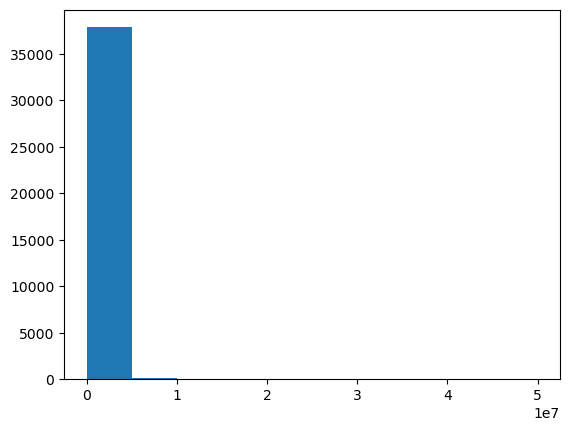

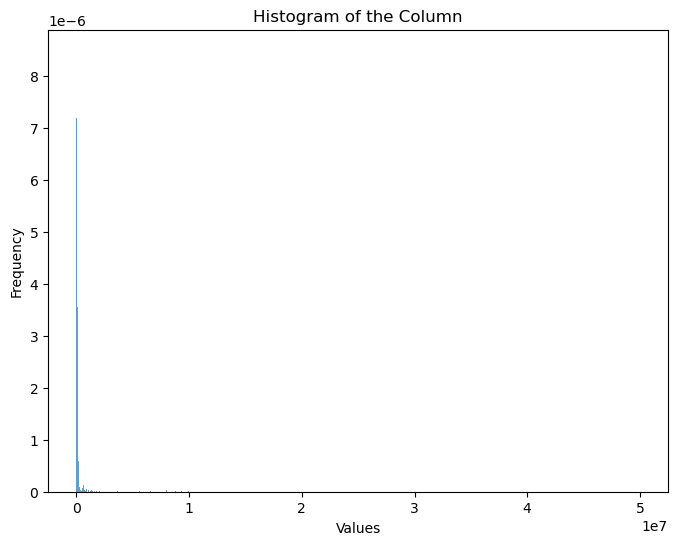

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 6))
plt.hist(df.Annual_Salary, bins='auto', density=True, alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of the Column')
plt.show();